# Introduction to Natural Language Processing

This tutorial provides a quick introduction into Natural Language Processing (NLP) with a practical exercise.

Thoughout the tutorial, you will be using Python programming language. First, you will learn about basic textual preprocessing techniques and important NLP tasks. Then, you will get to play with a popular NLP library **spaCy** and its cool visualizers. Once an introduction into NLP is completed, you will strengthen your skills by going through a practical exercise and learning how to train a simple sentiment classifier.

This tutorial includes many visualisations such as pictures, graphs and even wordclouds to ease your understanding process and also entertain you while you are learning the concepts.

### What is Natural Language?

The way we speak and listen, read and write:

![img1](img/img1.png)

#### Understanding how language works leads to understanding how human brain works

### Natural Language Processing (NLP) is ...

- a field of Computer Science  and Computational Lingustics
- an integral part of AI
- driven by advances in AI

NLP is about developing applications and services that are able to understand human languages.

![residuals](img/img4.png)

[source](https://www.ontotext.com/top-5-semantic-technology-trends-2017/)

### Making progress with NLP involves 

- gaining knowledge about the language
- gaining knowledge about the world
- creating a way to combine knowledge sources

### Relevant NLP tasks

The number of tasks relevant to area of NLP is large. Below is a wordcloud (used for illustration purposes only) that mentions some of them.

Here is the first time that we are going to use the **wordcloud** library. It gives us an easy way to display different words in a custom shape. Here, we are using a simple oval shape, but you can try your own shape by placing your picture with a custom shape into **img** folder and loading it below instead of **img3.png**

The size of a phrase in the wordcloud depends on the weights assigned to it. Here, I assigned some exemplary weights. You can change the weights and see how the size of the corresponding weight changes.

Relevant tasks


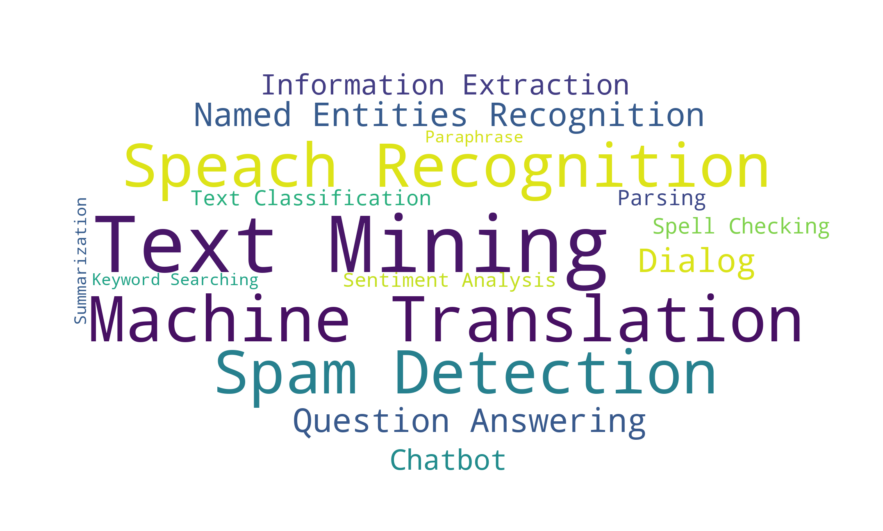

In [51]:
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

d = {'Spam Detection' : 2,      'Text Classification' : 1,     'Named Entities Recognition' : 2,     'Information Extraction': 2,
     'Parsing' : 1,         'Sentiment Analysis': 1,     'Speach Recognition': 2,      'Machine Translation': 2,
    'Spell Checking' : 1,    'Keyword Searching' : 1,     'Question Answering' : 2,     'Paraphrase' : 1,
     'Summarization' : 1,      'Dialog' : 2,     'Chatbot': 2,     'Text Mining' : 3, 
    }

my_mask = np.array(Image.open("img/img3.png"))

#Generating wordcloud.
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(width=2000,height=1400,  mask=my_mask, background_color="white").generate_from_frequencies(d)

print("Relevant tasks")
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Text mining / Text Analytics

is the proces of deriving meaningful information from natural language text.

![residuals](img/img2.png)

[source](https://www.ontotext.com/top-5-semantic-technology-trends-2017/)

## Basic textual pre-processing techniques

Let's have a look at some basic preprocessing techniques that are often used for initial language pre-processing. Further advances in NLP often allow us to ignore these technique and used the text as it is. However, it is useful to get to know the basic techniques that are still often used in practice before moving to the advanced ones.

Here is the list:

- Regular Expressions
- Word Tokenization
- Stemming (base form or root form of words)
- Lemmatization (maps several words into the same common root)
- Sentence Segmentation    

### Regular Expressions

is the most basic and fundamental tool for textual processing. It is simple and fast, and is perfect when you need to find a specific term and its varuations in the text.

Variants of the same word:

**Westminster**             **westminster**

A common pattern is  **[wW\]estminster**


A pattern for any digit is: **[0-9]**

A pattern for any two digits is **[0-9\]\{2\}**


Let's see how regular expressions can be used to identify the name of an ISIN in a text line:

In [52]:
# Example of extracting ISINs from a list using RegEx

import re

def get_ISIN_regex(text):
    isin = re.search(r'[A-Z]{2}[A-z0-9]{9}\d\b', text)
    if isin:
        return isin.group(0)

ISIN_list = ['IE00B68JD125', 'KYG5378Q1579', 'IE000000', 'Wrong ISIN', 'Find an ISIN here: IE00B68JD125']

for isin in ISIN_list:
    print(get_ISIN_regex(isin))

IE00B68JD125
KYG5378Q1579
None
None
IE00B68JD125


# NLTK

The Natural Language Toolkit (NLTK) is a Python library that allow researchers to apply a set of computational methods to texts. It can be seen as a collection of useful tools which researchers can use for training and development purposes. This tools can be employed to break up text into smaller pieces, to pre-process text or even to identify whether a word belongs to a certain language.

### Basic text Pre-processing

1. Tokenizing words in a text
2. Normalising word formats (Stemming and Lemmatization)
3. Segmenting senteces



![residuals](img/img5.png)

Above examples must have helped you understand the concept of normalization of text, although normalization of text is not restricted to only written document but to speech as well. Stemming and Lemmatization helps us to achieve the root forms (sometimes called synonyms in search context) of inflected (derived) words.
Stemming is different to Lemmatization in the approach it uses to produce root forms of words and the word produced. [source](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python/)

Let's import NLTK, take a sample text and look at keywords within it.
Let's only print out those tokens that appear in the text 3 time or more.

In [55]:
import nltk
from nltk.tokenize import word_tokenize 

text = """U.S.-China trade talks to continue for third day - U.S. officials.
BEIJING (Reuters) - The United States and China will continue trade talks in Beijing for an unscheduled third day, a member of the U.S. delegation said on Tuesday, as the world’s two largest economies looked to resolve their bitter trade dispute.
Steven Winberg, Assistant Secretary for Fossil Energy at the U.S. Department of Energy told reporters at the U.S. delegation’s hotel that talks, which began on Monday, had gone well.

“I confirm we’re continuing tomorrow, yes,” Winberg told reporters, declining to answer further questions.

A spokeswoman for the U.S. Trade Representative’s office, which is leading the U.S. negotiating team, also said talks would continue on Wednesday and “a statement will likely follow then.”
"""

# [Source](https://uk.reuters.com/article/uk-usa-trade-china/u-s-china-trade-talks-to-continue-for-third-day-u-s-officials-idUKKCN1P215X)


In [56]:
nltk.download('punkt')
print("\n")
tokens = word_tokenize(text)

def print_frequent_tokens(tokens):
    freq = nltk.FreqDist(tokens)
    for key,val in freq.items():
        if val > 2:
            print (str(key) + '\t:\t' + str(val))
    print("\nThe total number of unique keywords in the text is %s" % len(freq))
    
print_frequent_tokens(tokens)



continue	:	3
talks	:	4
to	:	3
on	:	3
’	:	4
trade	:	3
s	:	3
for	:	4
,	:	10
the	:	6
U.S.	:	6
.	:	5

The total number of unique keywords in the text is 94


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ContentLab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Stemming

Stemming is the process of reducing words to their word stem, base or root form.

Porter Stemmer is a popular stemmer of English

Examples:

    weight     -> weight
    natural    -> natur
    language   -> languag
    processing -> process
 
Let's apply Porter Stemmer to the tokens from our text.

In [57]:
stemmer = nltk.stem.PorterStemmer()

tokens_stemmed = [stemmer.stem(token) for token in tokens]

print_frequent_tokens(tokens_stemmed)

to	:	3
continu	:	4
on	:	3
’	:	4
trade	:	4
s	:	3
the	:	7
for	:	4
u.s.	:	6
,	:	10
talk	:	4
.	:	5

The total number of unique keywords in the text is 90


You can see that the number of keywords has been reduced after stemming is applied (from 94 to 90). The reason is that several keywords share the same root and the stemming process converted those keywords into their root forms so that after the stemming is applied those keywords are counted as being the same because because they were reduced to the the same root.

### Lemmatization

Lemmatisation is the process of grouping together different forms of a word so they can be analysed as a single item.

#### How to use Lemmatizer in NLTK

The NLTK Lemmatization method is based on WordNet’s built-in morphy function. Here is the introduction from WordNet official website:

WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. [Source](https://textminingonline.com/dive-into-nltk-part-iii-part-of-speech-tagging-and-pos-tagger)


Let's apply Lemmatization to our initial tokens:

In [59]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

tokens_lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]

print_frequent_tokens(tokens_lemmatized)

continue	:	3
to	:	3
on	:	3
’	:	4
trade	:	3
s	:	3
a	:	3
for	:	4
,	:	10
the	:	6
talk	:	4
U.S.	:	6
.	:	5

The total number of unique keywords in the text is 93


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ContentLab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


You can see that the number of keywords has also been reduced after lemmatization is applied (from 94 to 93). 

#### Stemming or lemmatization?

- Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

- Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma.

### Removing Stop Words

Text may contain stop words like ‘the’, ‘is’ and ‘are’ that do not carry any significant semantic meaning. 
Stop words can be filtered from the text to be processed. 
There is no universal list of stop words in nlp research, however the nltk module contains a list of stop words.


In [60]:
nltk.download('stopwords')

import random
from nltk.corpus import stopwords  
stop_words = set(stopwords.words('english'))

print("\nHere is a random sample of 10 words from a list of stop words in NLTK ")
print(random.sample(stop_words, 10))


Here is a random sample of 10 words from a list of stop words in NLTK 
['your', "aren't", 'that', 'very', 'are', 'at', 'a', 'such', "you'd", 'if']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ContentLab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
### Removing Stop words

tokens_filtered = [w for w in tokens_lemmatized if not w in stop_words] 
        
print_frequent_tokens(tokens_filtered)

continue	:	3
trade	:	3
.	:	5
,	:	10
’	:	4
talk	:	4
U.S.	:	6

The total number of unique keywords in the text is 72


### Sentence Segmentation

Sentence boundary disambiguation (SBD), also known as Sentence Breaking or Sentence Segmentation, is the problem in natural language processing of deciding where sentences begin and end. Often natural language processing tools require their input to be divided into sentences for a number of reasons. 

However sentence boundary identification is challenging because punctuation marks are often ambiguous. For example, a period may denote an abbreviation, decimal point, an ellipsis, or an email address – not the end of a sentence. About 47% of the periods in the Wall Street Journal corpus denote abbreviations. As well, question marks and exclamation marks may appear in embedded quotations, emoticons, computer code, and slang. [Source](https://textminingonline.com/dive-into-nltk-part-ii-sentence-tokenize-and-word-tokenize)

Let's have a look at our initial text and see how sentences are tokenized using NLTK:

In [63]:
from nltk.tokenize import sent_tokenize

sent_tokenize_list = sent_tokenize(text)

print("\n")
print("The original text is: \n")
print(text)
print("\nThe text split into sentences: \n")
print(sent_tokenize_list)
print("\n\nThe first sentence is: \n")
print(sent_tokenize_list[0])



The original text is: 

U.S.-China trade talks to continue for third day - U.S. officials.
BEIJING (Reuters) - The United States and China will continue trade talks in Beijing for an unscheduled third day, a member of the U.S. delegation said on Tuesday, as the world’s two largest economies looked to resolve their bitter trade dispute.
Steven Winberg, Assistant Secretary for Fossil Energy at the U.S. Department of Energy told reporters at the U.S. delegation’s hotel that talks, which began on Monday, had gone well.

“I confirm we’re continuing tomorrow, yes,” Winberg told reporters, declining to answer further questions.

A spokeswoman for the U.S. Trade Representative’s office, which is leading the U.S. negotiating team, also said talks would continue on Wednesday and “a statement will likely follow then.”


The text split into sentences: 

['U.S.-China trade talks to continue for third day - U.S. officials.', 'BEIJING (Reuters) - The United States and China will continue trade talk

In this example, you can see that the algorithm correctly recognised periods in "U.S." as a part of an abbreviation. 

### Part-Of-Speech Tagging

Part-of-speech tagging (POS tagging or PoS tagging or POST) is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech based on both its definition and its context.

Parts of speech tagging can be important for syntactic and semantic analysis. 

![residuals](img/img6.png)

If you wish to train your own POS Tagger, go to the source link:
[Source](https://nlpforhackers.io/training-pos-tagger/)

POS tags explained [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

NLTK has a tool for Part-Of-Speach Tagging as well, let's explore it:

In [64]:
nltk.download('averaged_perceptron_tagger')

text = """The cracks in China's economy appear to be widening."""

print("Part-Of-Speech Tagging:\n")
print(nltk.pos_tag(nltk.word_tokenize(text)))

Part-Of-Speech Tagging:

[('The', 'DT'), ('cracks', 'NNS'), ('in', 'IN'), ('China', 'NNP'), ("'s", 'POS'), ('economy', 'NN'), ('appear', 'VBP'), ('to', 'TO'), ('be', 'VB'), ('widening', 'VBG'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ContentLab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# spaCy 

#### Industrial-Strength Natural Language Processing

spaCy is a free open-source library for Natural Language Processing in Python. It features NER, POS tagging, dependency parsing, word vectors and more.

[Source](https://spacy.io/) (developed by Matthew Honnibal)

Let's have a look at the powerful visualisation tools that come with spacy.

In [65]:
# Run the line below in your command line to load the language model:
# python -m spacy download en_core_web_sm

import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [66]:
#Dependency Parsing

text = """Alice is Bobby's sister"""

doc = nlp(text)
displacy.render(doc, style='dep', jupyter=True)

#Vizualizer available at https://explosion.ai/demos/displacy-ent

In [67]:
#Named Entity Recognition

text = """Chelsea have signed Borussia Dortmund forward Christian Pulisic for 64m euros (£58m), 
but will loan him back to the German club until the end of the season."""

doc = nlp(text)

displacy.render(doc, style='ent', jupyter=True)

#Vizualizer available at https://explosion.ai/demos/displacy



## Practical exercise - Text Classification - Sentiments in Movie Reviews

Text classification is one of the fundamental tasks in NLP with broad applications such as sentiment analysis, spam detection,  topic labeling, intent detection, etc. Spam detection software uses text classification to find out whether an incoming email should appear in the inbox or moved to the spam folder.

Sentiment analysis is a type of text classification whose goal is to determine the polarity of content, in particular, the opinion of the author. Sentiment analysis is useful to analyze Twitter posts to find out people's opinion of a movie, or to gather people’s opinion about a new product.

### Text Classification Workflow

![image](img/img7.png)

[Source](https://developers.google.com/machine-learning/guides/text-classification/)

### Task description

We will train a text classifer for sentiment analysis using the Internet Movie Database (IMDb) movie reviews dataset.
This dataset consists of reviews posted by people on the IMDb website and corresponding labels (“positive” or “negative”) which indicate the reviewer's opinion about the movie.

[Dataset](http://ai.stanford.edu/~amaas/data/sentiment/) is publicly available.

The first step is to gather data. 
The more training examples you have the better you are able to train the classifier. The initail dataset is quite big it contains 100 000 reviews. However, to reduce the time required to pre-process the data and to train a classifier, I only took 4000 reviews from the dataset: first 1000 positive and first 1000 negative reviews from both training and testing data subsets.

### Gathering Data

The function below allows to load the dataset from the repository.

In [68]:
def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    """Loads the IMDb movie reviews sentiment analysis dataset.

    # Arguments
        data_path: string, path to the data directory.
        seed: int, seed for randomizer.

    # Returns
        A tuple of training and validation data.
        Number of training samples: 25000
        Number of test samples: 25000
        Number of categories: 2 (0 - negative, 1 - positive)

    # References
        Mass et al., http://www.aclweb.org/anthology/P11-1015

        Download and uncompress archive from:
        http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    """
    imdb_data_path = os.path.join(data_path, 'aclImdb')
    
    imdb_data_path = data_path

    # Load the training data
    train_texts = []
    train_labels = []
    for category in ['pos', 'neg']:
        train_path = os.path.join(data_path, 'train', category)
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(train_path, fname), encoding="utf8") as f:
                    train_texts.append(f.read())
                train_labels.append(0 if category == 'neg' else 1)

    # Load the validation data.
    test_texts = []
    test_labels = []
    for category in ['pos', 'neg']:
        test_path = os.path.join(data_path, 'test', category)
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(test_path, fname), encoding="utf8") as f:
                    test_texts.append(f.read())
                test_labels.append(0 if category == 'neg' else 1)

    # Shuffle the training data and labels.
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)

    return train_texts, train_labels, test_texts, test_labels

#Source https://developers.google.com/machine-learning/guides/text-classification/step-2

In [70]:
%%time

import os

imdb_data_path = "datasets/aclImdb_v1/aclImdb/"

train_texts, train_labels, test_texts, test_labels = load_imdb_sentiment_analysis_dataset(imdb_data_path, 123)

Wall time: 528 ms


### Exploring the data

It's time to explore the data. Let's have a look a sample review.

In [72]:
item = 10

print(train_texts[item])
print("\nLabel is %s" % "Positive" if train_labels[item] == 1 else "Negative")

A long time ago, in a galaxy far, far away.....There was a boy who was only two years old when the original "Star Wars" film was released. He doesn't remember first seeing the movie, but he also doesn't remember life before it. He does remember the first "Star Wars" themed gift he got...a shoebox full of action figures from the original set. He was too young to fully appreciate how special that gift would be. But years later, he would get what to this day goes down as one of the best gifts he's ever received: another box full of action figures, ten of the final twelve he needed to complete his collection. It's now legendary in this boy's family how the last action figure he needed, Anakin Skywalker, stopped being produced and carried in stores, and how this boy went for about ten years (until he got into college) trying to track one down and finally bought it from someone on his dorm floor for a bag of beer nuggets (don't ask...it's a Northern Illinois University thing).<br /><br />I c

The functions below will allow us to count the median number of words in reviews, plot a sample distribution of the words and plot a  frequency distribution of words for both training and testing datasets.

When exploring a dataset, it is important to understand whether data in training and testing are similar and follow the same distribution. If we ensure that the data doesn't change over time, we can be certain that the trained model will produce stable performance over time. 

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]
    
    plt.figure(figsize=(15,8))
    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.8, color='b')    
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)    
    plt.show()


Exploring Training set

Median number of words per sample given corpus is 171


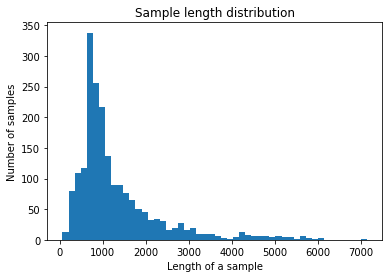

In [75]:
print("\nExploring Training set\n")
print("Median number of words per sample given corpus is %i" % get_num_words_per_sample(train_texts))
plot_sample_length_distribution(train_texts)


Exploring Testing set

Median number of words per sample given corpus is 175


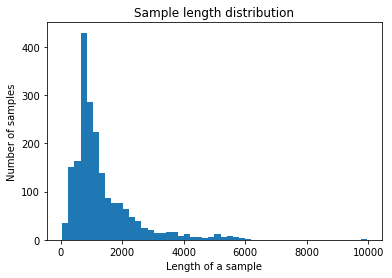

In [76]:
print("\nExploring Testing set\n")
print("Median number of words per sample given corpus is %i" % get_num_words_per_sample(test_texts))
plot_sample_length_distribution(test_texts)

The median number of words for training and testing datasets are close, and their distributions look alike. The plots below display frequency distribution of words for both training and testing datasets.

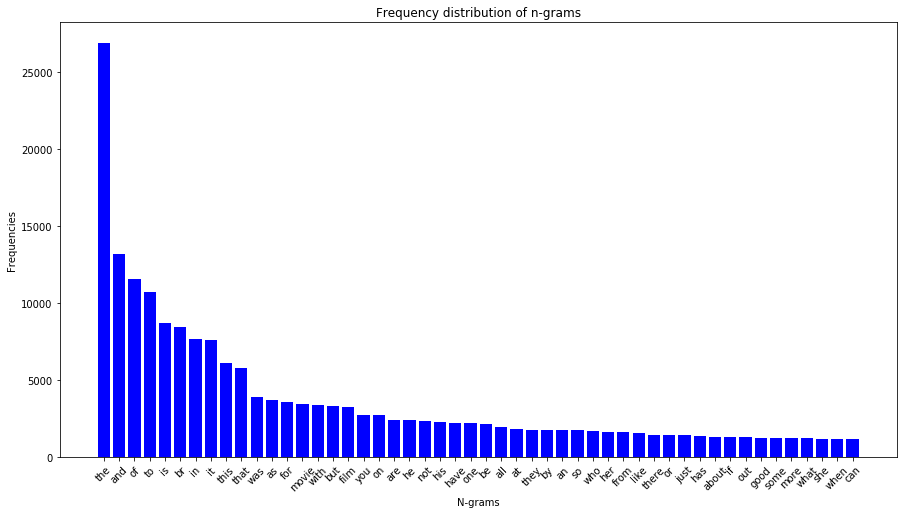

In [79]:
plot_frequency_distribution_of_ngrams(train_texts)

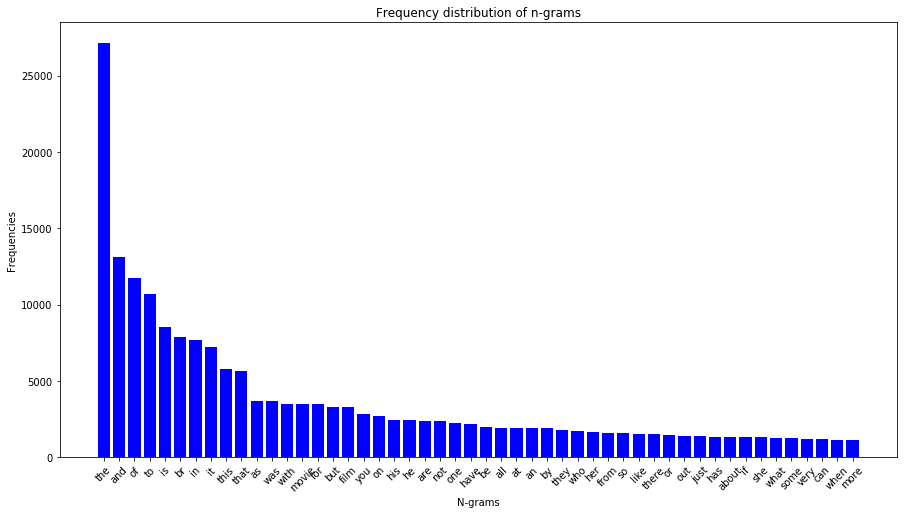

In [80]:
plot_frequency_distribution_of_ngrams(test_texts)

To visualise the concent of the reviews in the training and testing subsets, let's use word clouds:

In [81]:
from wordcloud import WordCloud

def plot_wordcloud(text):
    """Generates wordclouds from text.
    # Arguments
        text: string, sample text.
    """    
    # Generate a word cloud image with a limited max_font_size
    wordcloud = WordCloud(width=2000,height=1400, mask=my_mask, background_color="white").generate(text)
    #max_font_size=40, 
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    #wordcloud = WordCloud(width=2000,height=1400,  mask=my_mask, background_color="white").generate_from_frequencies(pos_dict)

Word Clouds from the Training Set


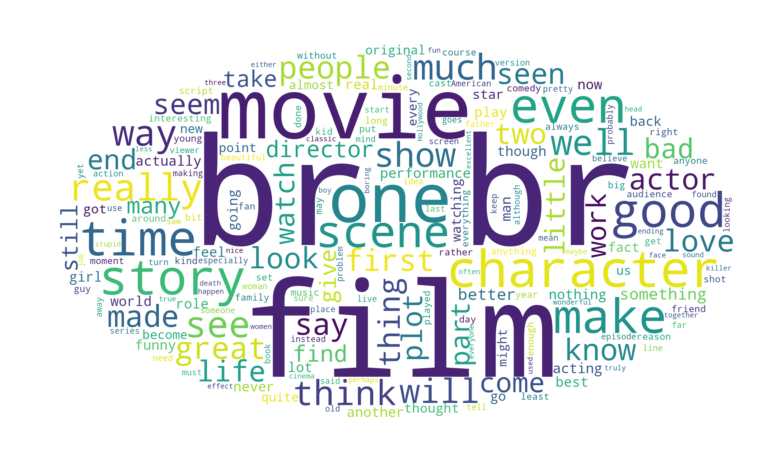

Wall time: 10.9 s


In [82]:
%%time

print("Word Clouds from the Training Set")

joined_train_text = ' '.join(train_texts)
plot_wordcloud(joined_train_text)

Word Clouds from the Testing Set


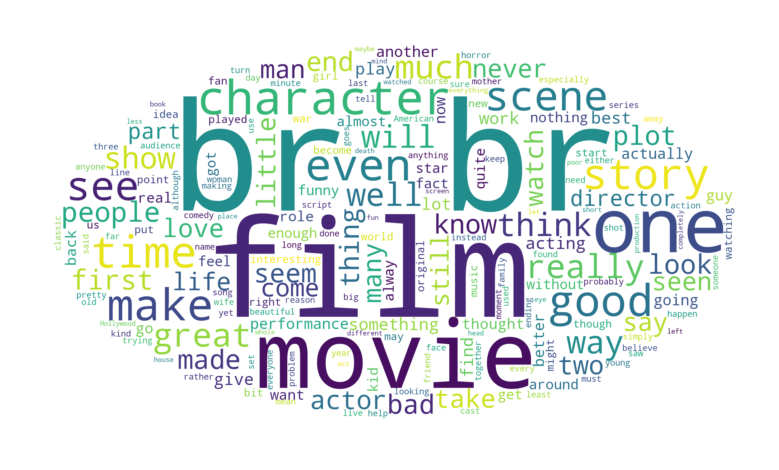

Wall time: 11.4 s


In [83]:
%%time

print("Word Clouds from the Testing Set")

joined_test_text = ' '.join(test_texts)
plot_wordcloud(joined_test_text)

### Preparing the data

In [28]:
%%time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Tokenization and Vectorization
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)
# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'
# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 5
# Limit on the number of features. We use the top 10K features.
TOP_K = 5000
# Create keyword arguments to pass to the vectorizer.
kwargs = {
        'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
        'dtype': 'int32',
        'strip_accents': 'unicode',
        'decode_error': 'replace',
        'analyzer': TOKEN_MODE,  # Split text into word tokens.
        'min_df': MIN_DOCUMENT_FREQUENCY,
}

Wall time: 0 ns


In [29]:
%%time

# Tokenizing samples into unigrams + bigrams provides good accuracy while taking less compute time.
vectorizer = CountVectorizer(**kwargs)

# Learn vocabulary from training texts and vectorize training texts.
x_train = vectorizer.fit_transform(train_texts)

# Vectorize testing texts.
x_test = vectorizer.transform(test_texts)

Wall time: 5.03 s


In [84]:
# CountVectorizer 
train_texts[10]

'A long time ago, in a galaxy far, far away.....There was a boy who was only two years old when the original "Star Wars" film was released. He doesn\'t remember first seeing the movie, but he also doesn\'t remember life before it. He does remember the first "Star Wars" themed gift he got...a shoebox full of action figures from the original set. He was too young to fully appreciate how special that gift would be. But years later, he would get what to this day goes down as one of the best gifts he\'s ever received: another box full of action figures, ten of the final twelve he needed to complete his collection. It\'s now legendary in this boy\'s family how the last action figure he needed, Anakin Skywalker, stopped being produced and carried in stores, and how this boy went for about ten years (until he got into college) trying to track one down and finally bought it from someone on his dorm floor for a bag of beer nuggets (don\'t ask...it\'s a Northern Illinois University thing).<br /><

In [85]:
x_train[0]

<1x5000 sparse matrix of type '<class 'numpy.float32'>'
	with 186 stored elements in Compressed Sparse Row format>

In [32]:
%%time

# When we convert texts to tokens we may end up with a large number of tokens. We want to drop rarely occurring tokens
# as well as tokens that don't contribute heavily to label predictions. 
# We use the `chi2` function to identify the top 10K features.
# Select top 'K' of the vectorized features.
selector = SelectKBest(chi2, k=min(TOP_K, x_train.shape[1]))
selector.fit(x_train, train_labels)
x_train = selector.transform(x_train)
x_test = selector.transform(x_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Wall time: 111 ms


In [33]:
x_train[0]

<1x5000 sparse matrix of type '<class 'numpy.float32'>'
	with 186 stored elements in Compressed Sparse Row format>

### Building and Training the Model; Tuning hyper parameters

In [34]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-2, 10, base=2, num=8)}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, cv=4)
clf.fit(x_train, train_labels)

Wall time: 4.9 s


### Evaluating the model's performance

In [35]:
print("Best score: %s" % clf.best_score_)
print("Best parameters:")
print(clf.best_params_)

Best score: 0.9085
Best parameters:
{'C': 0.8203353560076379}


In [36]:
from sklearn import metrics

pred_test = clf.predict(x_test)

print("The accuracy  is %s" % str(round(100*metrics.accuracy_score(pred_test, test_labels), 2)))
print("The precision is %s" % str(round(100*metrics.precision_score(pred_test, test_labels), 2)))
print("The recall    is %s" % str(round(100*metrics.recall_score(pred_test, test_labels), 2)))
print("The F1 score  is %s" % str(round(100*metrics.f1_score(pred_test, test_labels), 2)))

The accuracy  is 83.35
The precision is 78.3
The recall    is 87.1
The F1 score  is 82.46


In [37]:
print("The confusion matrix:\n")
print(metrics.confusion_matrix(pred_test, test_labels))

The confusion matrix:

[[884 217]
 [116 783]]


In [38]:
print("Classification Report: \n")
print(metrics.classification_report(pred_test, test_labels))

Classification Report: 

             precision    recall  f1-score   support

          0       0.88      0.80      0.84      1101
          1       0.78      0.87      0.82       899

avg / total       0.84      0.83      0.83      2000



### Feature Importance

Logistic Regression allows us to find out which features are considered the most influential when making the classification.

In the following step, we will get a list of features and their corresponding coefficients, sort them according to their coefficients and then explore their values.

In [39]:
import pandas as pd

# Obtaining feature names from the vectorizer
feature_names = pd.Series(vectorizer.get_feature_names())
# Finding out whether a feature is selected during the feature selection step
if_feature_selected = selector.get_support()
# Getting a list of selected features
selected_features = feature_names[if_feature_selected].reset_index(drop=True)

# Creating a dataframe to save features and their coefficients
feature_weights = pd.DataFrame(columns=['feature', 'weight'])
feature_weights['feature'] = selected_features
# Obtaining coefficients learnt by the classifier during the training phase
feature_weights['weight']  = clf.best_estimator_.coef_[0]
feature_weights = feature_weights.sort_values(by='weight', ascending=True).reset_index(drop=True)

print("Features assigned the most negative coefficients are: ")
feature_weights.iloc[:10]

Features assigned the most negative coefficients are: 


,feature,weight
0,worst,-1.144936
1,awful,-0.884144
2,the worst,-0.747058
3,bad,-0.717396
4,disappointed,-0.712412
5,looking,-0.684598
6,talent,-0.661868
7,virus,-0.618928
8,ridiculous,-0.611841
9,waste,-0.597503


In [40]:
print("Features assigned the most positive coefficients are: ")
feature_weights.iloc[-10:]

Features assigned the most positive coefficients are: 


,feature,weight
4990,lot,0.590732
4991,perfect,0.610065
4992,the way,0.613990
4993,loved,0.644733
4994,great,0.662078
4995,job,0.673469
4996,amazing,0.684177
4997,watch it,0.696544
4998,enjoyed,0.752847
4999,wonderful,0.804511


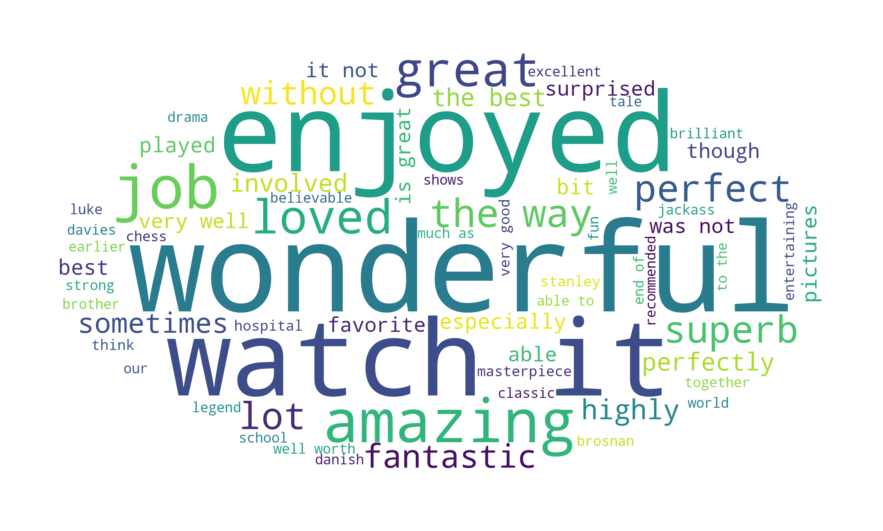

<Figure size 432x288 with 0 Axes>

In [41]:
# Selecting features with high positive coefficients and saving them to a dictionary with corresponding values
pos_features = feature_weights[feature_weights['weight']>0.4]
pos_dict = pos_features.set_index('feature').T.to_dict('index')['weight']

#Generating wordcloud.
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(width=2000,height=1400,  mask=my_mask, background_color="white").generate_from_frequencies(pos_dict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.gcf().clear()

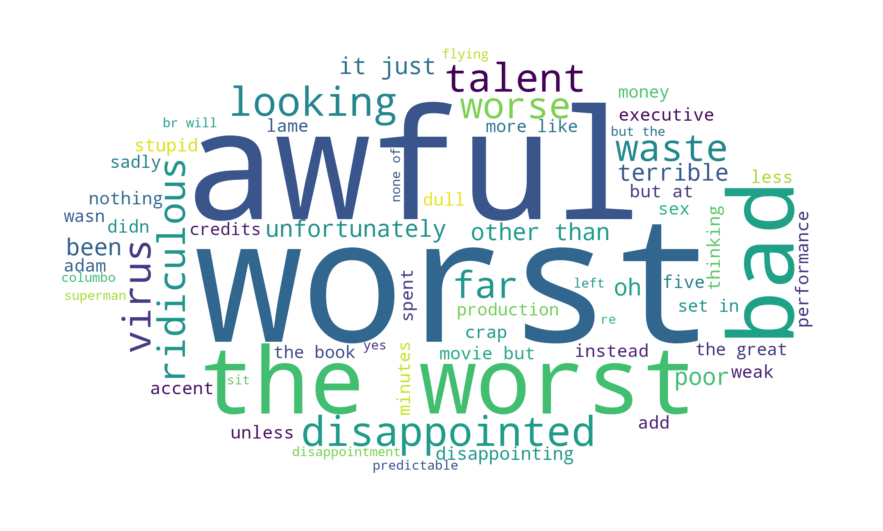

<Figure size 432x288 with 0 Axes>

In [49]:
# Selecting features with high negative coefficients and saving them to a dictionary with corresponding values
neg_features = feature_weights[feature_weights['weight']<-0.4]
neg_features.loc[:,'weight'] = neg_features.loc[:, 'weight'].abs()
neg_dict = neg_features.set_index('feature').T.to_dict('index')['weight']

#Generating wordcloud.
wordcloud = WordCloud(width=2000,height=1400,  mask=my_mask, background_color="white").generate_from_frequencies(neg_dict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.gcf().clear()

### Deploying the model

We save the model into a pickle file.
This file can be easily loaded into a separate application for further use.

In [43]:
from sklearn.externals import joblib

#Saving the model
modelname = 'sentiment_classifier.pkl'
joblib.dump(clf, os.path.join('output/', modelname))

['output/sentiment_classifier.pkl']

## Conclusions

In this tutorial, we have done the following:

1. Reviewed the concepts of Natural Language Preprocessing
2. Discussed applications of NLP for solving real life problems
3. Examined textual pre-processing tasks
4. Run a practical exercise of sentiment classification
5. Explored dataset of movies reviews
6. Trained, tested and evaluated a classification model